# Vamos con KNN

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,Normalizer,RobustScaler,StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score



In [8]:
from preprocessing import obtener_datasets
from preprocessing import aplicar_preparacion
from preprocessing import conversion_numerica
from preprocessing import plot_roc_curves
from preprocessing import graficar_matriz_confusion

df, df_holdout = obtener_datasets()

X_df, y_df = aplicar_preparacion(df)


# acá solo convierto simplemente a numerico.. primer preprocessing!
X_df = conversion_numerica(X_df) 


## escalo las variables

In [9]:
scaled = StandardScaler().fit_transform(X_df)
X_df =  pd.DataFrame(scaled, index = X_df.index, columns = X_df.columns)

In [10]:
X_df

,anios_estudiados,edad,educacion_alcanzada,suma_declarada_bolsa_argentina,horas_trabajo_registradas,genero_mujer,estado_marital_matrimonio_civil,estado_marital_matrimonio_militar,estado_marital_pareja_no_presente,estado_marital_separado_a,...,categoria_de_trabajo_sin_trabajo,categoria_de_trabajo_trabajo_voluntariado,religion_budismo,religion_cristianismo,religion_judaismo,religion_otro,rol_familiar_registrado_con_hijos,rol_familiar_registrado_otro,rol_familiar_registrado_sin_familia,rol_familiar_registrado_soltero_a
0,1.105720,0.030671,0.831554,0.159762,-0.035429,-0.703071,-0.922841,-0.026587,-0.114037,-0.180285,...,-0.014664,-0.02074,-0.181552,0.413020,-0.325768,-0.091612,-0.429346,-0.17625,1.708991,-0.344032
1,1.105720,0.837109,0.831554,-0.133670,-2.222153,-0.703071,1.083611,-0.026587,-0.114037,-0.180285,...,-0.014664,-0.02074,-0.181552,0.413020,-0.325768,-0.091612,-0.429346,-0.17625,-0.585141,-0.344032
2,-0.395530,-0.042642,-0.213820,-0.133670,-0.035429,-0.703071,-0.922841,-0.026587,-0.114037,-0.180285,...,-0.014664,-0.02074,-0.181552,0.413020,-0.325768,-0.091612,-0.429346,-0.17625,1.708991,-0.344032
3,-1.146155,1.057047,-1.259194,-0.133670,-0.035429,-0.703071,1.083611,-0.026587,-0.114037,-0.180285,...,-0.014664,-0.02074,-0.181552,-2.421192,3.069667,-0.091612,-0.429346,-0.17625,-0.585141,-0.344032
4,1.105720,-0.775768,0.831554,-0.133670,-0.035429,1.422331,1.083611,-0.026587,-0.114037,-0.180285,...,-0.014664,-0.02074,-0.181552,-2.421192,3.069667,-0.091612,-0.429346,-0.17625,-0.585141,-0.344032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.730408,-0.849080,0.831554,-0.133670,-0.197409,1.422331,1.083611,-0.026587,-0.114037,-0.180285,...,-0.014664,-0.02074,-0.181552,0.413020,-0.325768,-0.091612,-0.429346,-0.17625,-0.585141,-0.344032
32557,-0.395530,0.103983,-0.213820,-0.133670,-0.035429,-0.703071,1.083611,-0.026587,-0.114037,-0.180285,...,-0.014664,-0.02074,-0.181552,0.413020,-0.325768,-0.091612,-0.429346,-0.17625,-0.585141,-0.344032
32558,-0.395530,1.423610,-0.213820,-0.133670,-0.035429,1.422331,-0.922841,-0.026587,-0.114037,-0.180285,...,-0.014664,-0.02074,-0.181552,0.413020,-0.325768,-0.091612,-0.429346,-0.17625,-0.585141,2.906704
32559,-0.395530,-1.215643,-0.213820,-0.133670,-1.655225,-0.703071,-0.922841,-0.026587,-0.114037,-0.180285,...,-0.014664,-0.02074,-0.181552,0.413020,-0.325768,-0.091612,2.329125,-0.17625,-0.585141,-0.344032


# Importo librerias necesarias y divido el set de entrenamiento

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=30,stratify=y_df)

# Voy a entrenar buscando la mejor configuración de hiperparámetros usando grid search

In [15]:
parametros = {"n_neighbors":np.arange(20,50,5),"weights":["uniform","distance"]}
clf = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10,shuffle= True, random_state= 10).split(X_train, y_train)
clf = GridSearchCV(clf, parametros, scoring='roc_auc', cv=cv, n_jobs = -1, verbose=4)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.6min finished


In [16]:
print(f"Best score: {clf.best_score_}")
print(f"Best params {clf.best_params_}")

Best score: 0.8808550206405814
Best params {'n_neighbors': 30, 'weights': 'uniform'}


AUC-ROC score sobre test:  0.8825687795340584
AUC-ROC score sobre train:  0.9013227076570610
Accuracy sobre test:  0.8400122831260556
Los mejores hiperpametros elegidos:  {'n_neighbors': 30, 'weights': 'uniform'}
              precision    recall  f1-score   support

  Bajo valor       0.93      0.87      0.90      5313
  Alto valor       0.55      0.72      0.62      1200

    accuracy                           0.84      6513
   macro avg       0.74      0.79      0.76      6513
weighted avg       0.86      0.84      0.85      6513



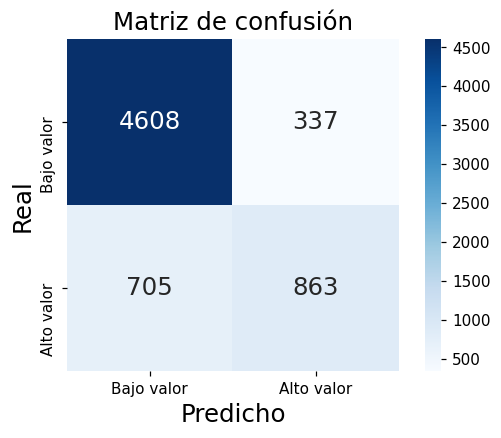

In [ ]:
print("AUC-ROC score sobre test: ", "%0.16f"  % roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
print("AUC-ROC score sobre train: ", "%0.16f"  % roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
print("Accuracy sobre test: ", "%0.16f"  % accuracy_score(y_pred, y_test))
print("Los mejores hiperpametros elegidos: ", clf.best_params_)
print(classification_report(y_pred, y_test, target_names=["Bajo valor", "Alto valor"]))
graficar_matriz_confusion(y_test, y_pred)
plot_roc_curves(clf, X_test, y_test, X_train, y_train)
